# Testing the ugv data manager

In [ ]:
from avapi.ugv import UgvScenesManager


data_root = "/data/shared/ugv/WILK_BASEMENT"
SM = UgvScenesManager(data_dir=data_root)
SD = SM.get_scene_dataset_by_index(0)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
found 7288 radar samples
found 7288 lidar samples
found 7288 camera samples
found 7288 imu (orientation only) samples
found 7288imu (full data) samples
found 7288 vehicle velocity samples


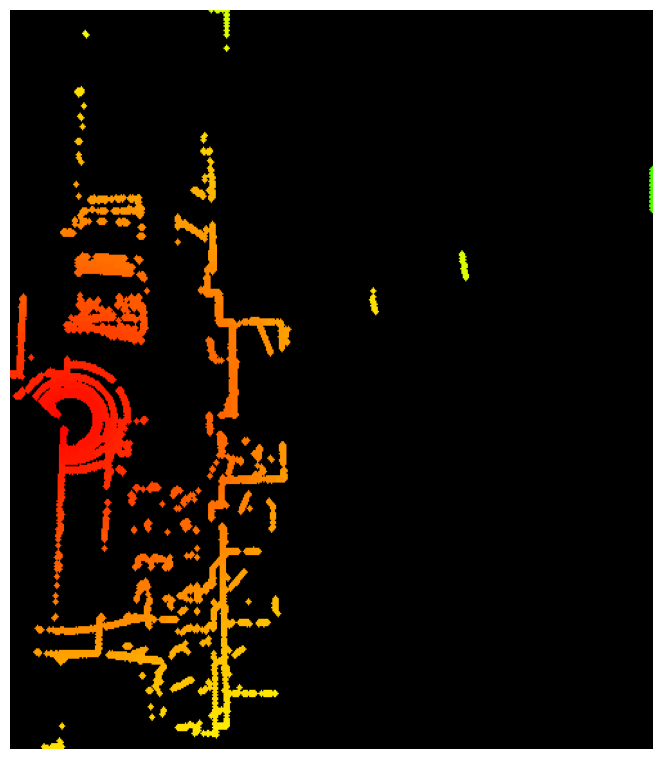

In [3]:
from avapi.visualize.snapshot import show_lidar_bev_with_boxes

pc = SD.get_lidar(frame=3, sensor="lidar")
show_lidar_bev_with_boxes(pc, [], inline=True)

## Show preprocessing result

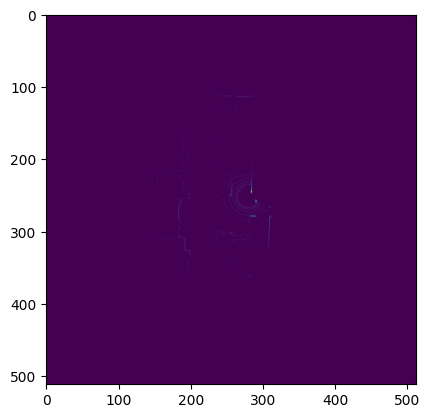

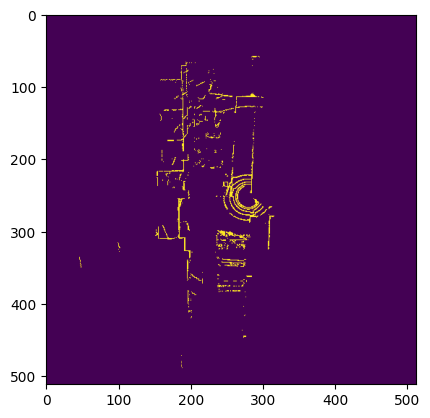

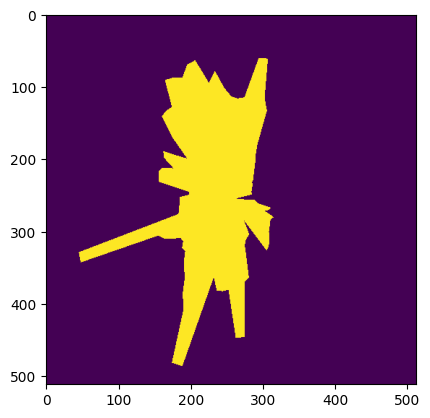

In [8]:
from fov.segmentation.preprocess import (
    point_cloud_to_image,
    preprocess_point_cloud_for_bev,
    point_cloud_to_gt_seg,
)
import matplotlib.pyplot as plt


# do preprocessing
ex = 20
extent = [(-ex, ex), (-ex, ex)]
pc = SD.get_lidar(frame=3, sensor="lidar")
pc_preproc = preprocess_point_cloud_for_bev(pc, max_range=ex)
pc_img = point_cloud_to_image(
    pc_preproc, max_range=ex, extent=extent, do_preprocess=False
)
gt_seg, gt_img = point_cloud_to_gt_seg(pc, max_range=ex, extent=extent)


# point cloud as image
plt.imshow(pc_img)
plt.show()


# binarized points
plt.imshow(pc_img > 0)
plt.show()


# gt mask
plt.imshow(gt_img)
plt.show()

In [ ]:
from fov.segmentation.dataset import BinaryFovDataset


dataset = BinaryFovDataset(
    data_dir="/data/shared/fov/fov_bev_segmentation/ugv/benign", split="train"
)

In [ ]:
from cv2 import imread


img = imread("/data/shared/fov/fov_bev_segmentation/ugv/benign/img/train/00000000.png")
plt.imshow(dataset[0][0][0, :, :])
plt.clim([0, 0.001])
plt.colorbar()
plt.show()

NameError: name 'dataset' is not defined